In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import morphology
from skimage.measure import label

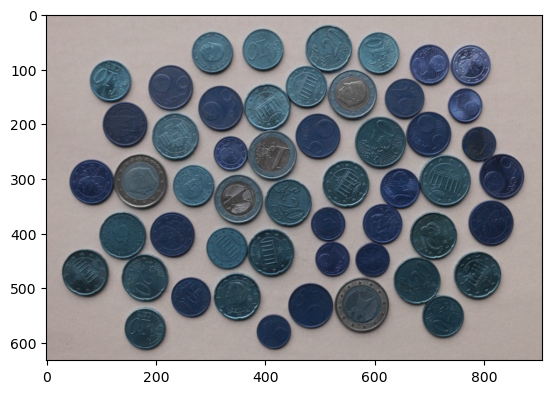

In [53]:
image = cv2.imread('coins.png')
plt.imshow(image)

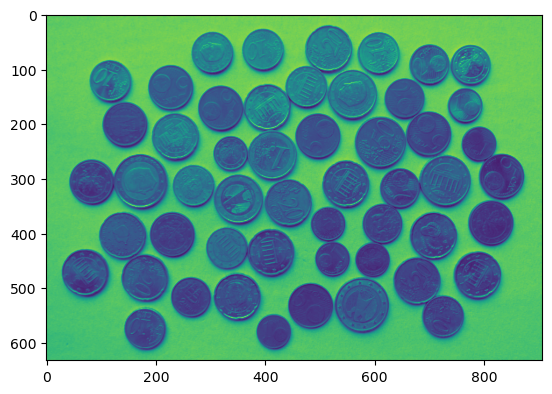

In [54]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

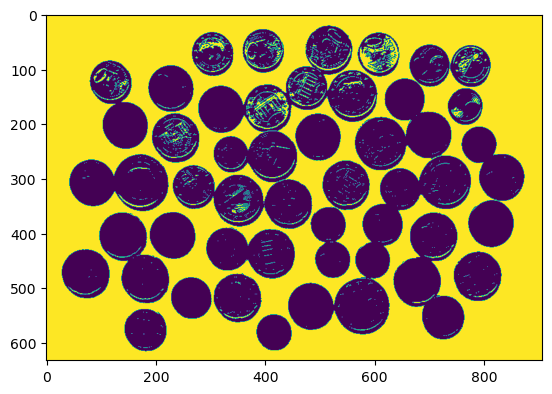

In [55]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

 Compute Euclidean distance from every binary pixel to the nearest zero pixel then find peaks

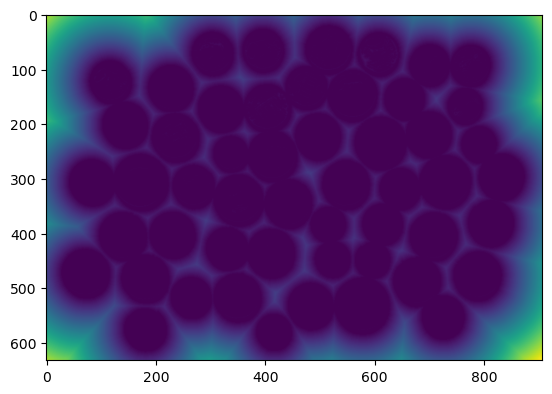

In [56]:
distance_map = ndi.distance_transform_edt(thresh)
plt.imshow(distance_map)

/tmp/ipykernel_14772/1594220103.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)


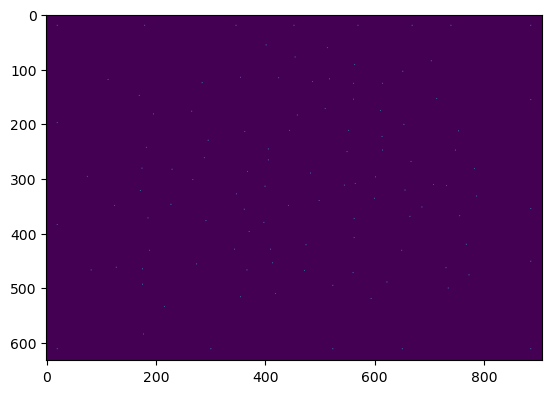

In [63]:
local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)
plt.imshow(local_max)

In [64]:
local_max.shape

(632, 907)

 Perform connected component analysis then apply Watershed


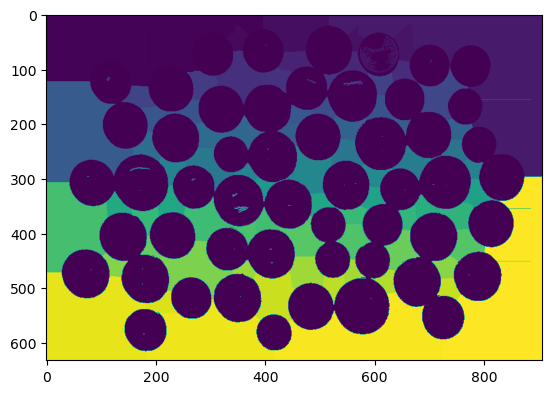

In [65]:
markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]
labels = watershed(-distance_map, markers, mask=thresh)

plt.imshow(labels)

In [14]:
# Iterate through unique labels
total_area = 0
for label in np.unique(labels):
    if label == 0:
        continue

    # Create a mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # Find contours and determine contour area
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv2.contourArea)
    area = cv2.contourArea(c)
    total_area += area
    cv2.drawContours(image, [c], -1, (36,255,12), 4)

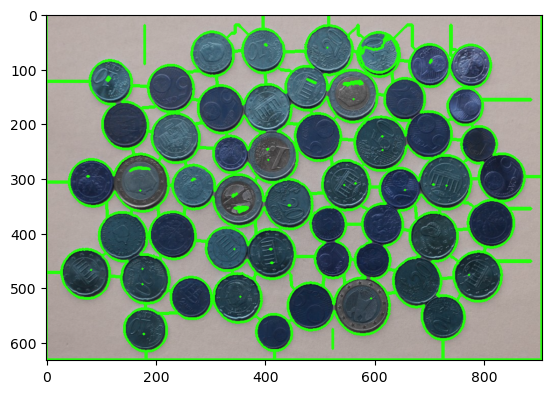

In [15]:
plt.imshow(image)

In [43]:
def watershedf(file,minDist,struct=(36,255,12),thickness=4):
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    distance_map = ndi.distance_transform_edt(thresh)
    local_max = peak_local_max(distance_map, indices=False, min_distance=minDist, labels=thresh)
    markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]
    labels = watershed(-distance_map, markers, mask=thresh)
    total_area = 0
    for label in np.unique(labels):
        if label == 0:
            continue

        mask = np.zeros(gray.shape, dtype="uint8")
        mask[labels == label] = 255
        
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        c = max(cnts, key=cv2.contourArea)
        area = cv2.contourArea(c)
        total_area += area
        cv2.drawContours(image, [c], -1, struct, thickness)

    return image

/tmp/ipykernel_14772/2926525810.py:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=minDist, labels=thresh)


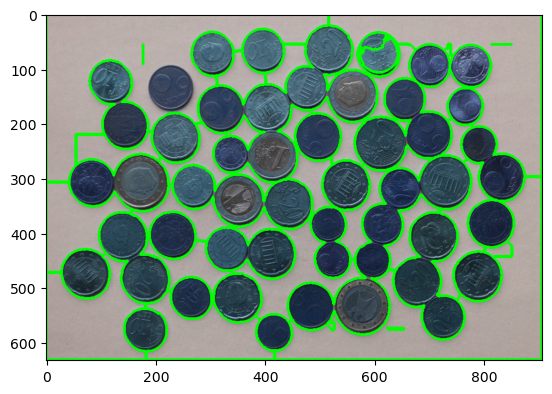

In [51]:
plt.imshow(watershedf('coins.png',minDist=55,struct=(0,255,0),thickness=3))
None

/tmp/ipykernel_14772/2926525810.py:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=minDist, labels=thresh)


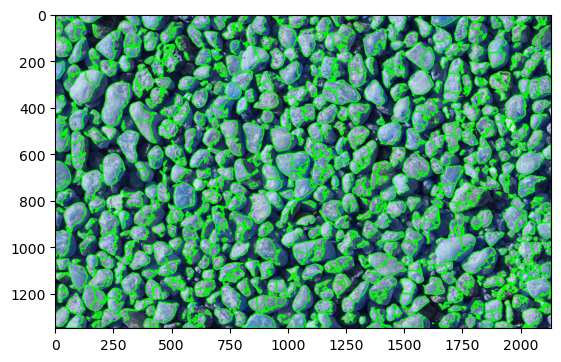

In [67]:
plt.imshow(watershedf('rocks.jpg',minDist=20,struct=(0,255,0),thickness=3))


In [76]:
image = cv2.imread('sponge.jpg')
plt.imsave('sponge1.jpg',image[40:110,25:160])

/tmp/ipykernel_14772/2926525810.py:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=minDist, labels=thresh)


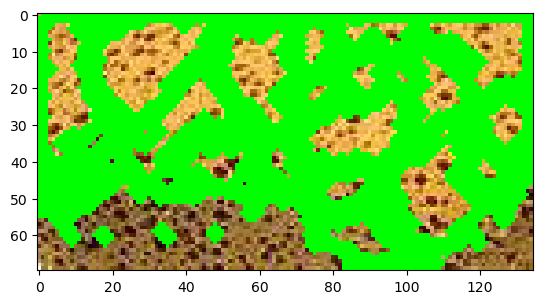

In [88]:
plt.imshow(watershedf('sponge1.jpg',minDist=9,struct=(0,255,0),thickness=3))

/tmp/ipykernel_14772/2926525810.py:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=minDist, labels=thresh)


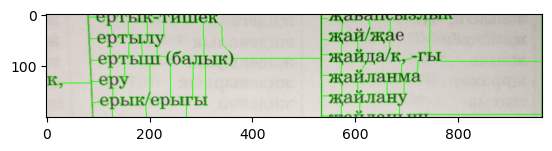

In [96]:
plt.imshow(watershedf('text.jpg',minDist=20,thickness=1)[400:600])